# Flow Show Scheduling with Setup Costs

In [1]:
import sys
sys.path.append('../src')
from pyschedule import Scenario, solvers, plotters

In [2]:
horizon = 30
S = Scenario('hello_pyschedule',horizon=horizon)
hide_tasks = list()

M1, M2, M3 = S.Resource('M1'), S.Resource('M2'), S.Resource('M3')

In [3]:
A1_M1, A1_M2, A1_M3 = S.Task('A1_M1',2,setup_state_A=2,group='A_M1'), S.Task('A1_M2',1+3,group='A_M2'), S.Task('A1_M3',1+2,group='A_M3')
A2_M1, A2_M2, A2_M3 = S.Task('A2_M1',2,setup_state_A=2,group='A_M1'), S.Task('A2_M2',1+3,group='A_M2'), S.Task('A2_M3',1+2,group='A_M3')

B1_M1, B1_M2, B1_M3 = S.Task('B1_M1',3,setup_state_B=2,group='B_M1'), S.Task('B1_M2',1+3,group='B_M2'), S.Task('B1_M3',1+2,group='B_M3')
B2_M1, B2_M2, B2_M3 = S.Task('B2_M1',3,setup_state_B=2,group='B_M1'), S.Task('B2_M2',1+3,group='B_M2'), S.Task('B2_M3',1+2,group='B_M3')
B3_M1, B3_M2, B3_M3 = S.Task('B3_M1',3,setup_state_B=2,group='B_M1'), S.Task('B3_M2',1+3,group='B_M2'), S.Task('B3_M3',1+2,group='B_M3')

In [4]:
S += A1_M1 <= A1_M2, A1_M2 <= A1_M3
S += A2_M1 <= A2_M2, A2_M2 <= A2_M3
S += B1_M1 <= B1_M2, B1_M2 <= B1_M3
S += B2_M1 <= B2_M2, B2_M2 <= B2_M3
S += B3_M1 <= B3_M2, B3_M2 <= B3_M3
S += A1_M1 > 1 #there needs to be time for a setup
S += B1_M1 > 1

In [5]:
A1_M1 += M1
A1_M2 += M2
A1_M3 += M3
A2_M1 += M1
A2_M2 += M2
A2_M3 += M3
B1_M1 += M1
B1_M2 += M2
B1_M3 += M3
B2_M1 += M1
B2_M2 += M2
B2_M3 += M3
B3_M1 += M1
B3_M2 += M2
B3_M3 += M3

In [6]:
# setup tasks
for i in range(horizon):
    T = S.Task('SA_M1_%i'%i,setup_state_A=1,group='SA_M1',schedule_cost=1000)
    T += M1
    
    T = S.Task('SB_M1_%i'%i,setup_state_B=1,group='SB_M1',schedule_cost=1000)
    T += M1
    
# fill tasks
for i in range(horizon):
    T = S.Task('FA_M1_%i'%i,setup_state_A=2,group='FA_M1',schedule_cost=0)
    T += M1
    S += T > 1 # do not allow filling in first period
    hide_tasks.append(T)
    
    T = S.Task('FB_M1_%i'%i,setup_state_B=2,group='FB_M1',schedule_cost=0)
    T += M1
    S += T > 1 #do not allow filling in first period
    hide_tasks.append(T)

In [7]:
for t in range(horizon):
    S += M1['setup_state_A'][t:t+2].inc <= 1
    S += M1['setup_state_B'][t:t+2].inc <= 1

In [8]:
S.use_makespan_objective()
task_colors = { A1_M1 : '#E68B07', A1_M2 : '#E68B07', A1_M3 : '#E68B07',
                A2_M1 : '#FCE916', A2_M2 : '#FCE916', A2_M3 : '#FCE916',
                B1_M1 : '#37F810', B1_M2 : '#37F810', B1_M3 : '#37F810',
                B2_M1 : '#92F8C1', B2_M2 : '#92F8C1', B2_M3 : '#92F8C1',
                B3_M1 : '#AAF7EB', B3_M2 : '#AAF7EB', B3_M3 : '#AAF7EB',
                S['MakeSpan'] : '#E71AEE'}

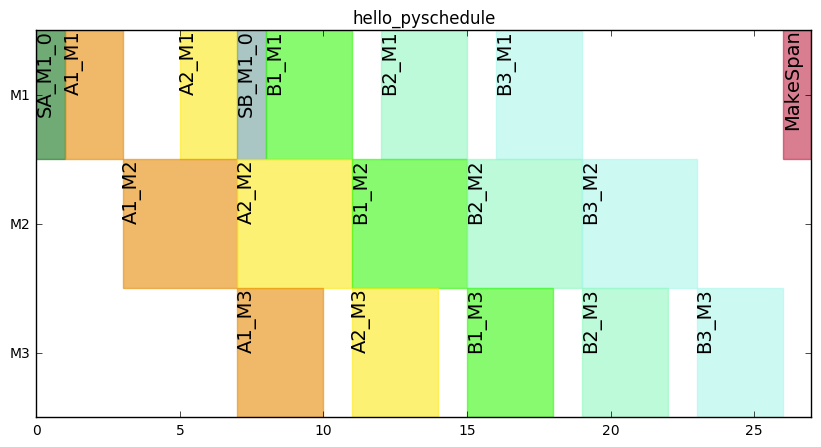

In [9]:
S.use_makespan_objective()

def run(S) :
    if solvers.mip.solve(S):
        %matplotlib inline
        plotters.matplotlib.plot(S,task_colors=task_colors,fig_size=(10,5),hide_tasks=hide_tasks,vertical_text=True)
    else:
        print('no solution exists')
run(S)